<a href="https://colab.research.google.com/github/Kusuma-Bhargavi-Nadendla/Machine-Learning/blob/main/MLLab6_LogisticRegression_ForBankDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
bank_df=pd.read_csv('bank.csv')
bank_df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [ ]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [ ]:
#DEALING WITH IMBALANCED DATASETS
bank_df.y.value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

In [ ]:
#To handle imbalanced datset,apply upsampling
from sklearn.utils import resample
bank_subscribed_no=bank_df[bank_df.y==0]
bank_subscribed_yes=bank_df[bank_df.y==1]
df_minority_upsampled=resample(bank_subscribed_yes, replace=True, n_samples=2000)
new_bank_df = pd.concat([bank_subscribed_no, df_minority_upsampled])


In [ ]:
from sklearn.utils import shuffle
new_bank_df= shuffle(new_bank_df)

In [ ]:
#Assigning List of oil column names in the Dutoframe
X_features =list(new_bank_df.columns)
#Remove the response variable from the tist
X_features.remove( "y")
X_features

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed']

In [ ]:
##get dummies() will convert oll the columns with data type o5
## objects
encoded_bank_df= pd.get_dummies(new_bank_df[X_features], drop_first= True)
X =encoded_bank_df

In [ ]:
#Encoding the subscribed column and assigning to
Y=new_bank_df.y.map(lambda x: int(x==1))

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y= train_test_split(X,Y,test_size= 0.3,random_state = 42)


In [ ]:
from sklearn.linear_model import LogisticRegression
##Initializing the model
logit =LogisticRegression()
##Fitting the model with X and Y values of the dataset
logit.fit(train_X, train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
pred_y =logit.predict(test_X)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
##Importing the metrics
from sklearn import metrics
#Defining the motrix to draw the confusion motriz from actual and
# predicted class Labels #
def draw_cm( actual, predicted):
    #Invoking confusion matrix from metric package. The matrix
    #will be oriented as [1,0] 1.e. the classes with label I will be represented by the first row and B as second row
    cm=metrics.confusion_matrix( actual, predicted)
    #Confusion will be plotted as heatmap for better visualization
    #The Labels ore configured to better interpretation from the plot
    sn.heatmap( cm, annot=True, fmt='.2f',
    xticklabels =["Subscribed", "Not Subscribed"],
    yticklabels =["Subscribed", "Not Subscribed"])
    plt.ylabel("True Label")
    plt.xlabel('Predicted label')
    plt.show()

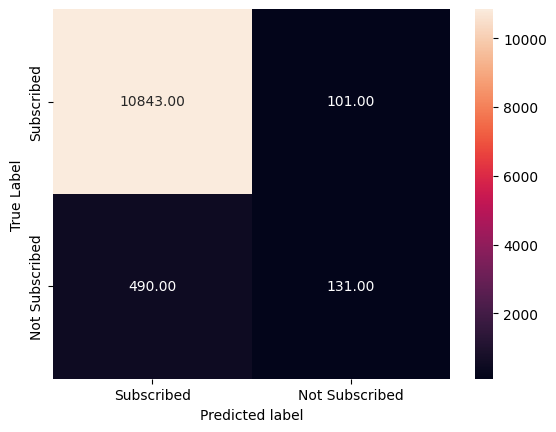

In [ ]:
cm= draw_cm(test_y, pred_y)

In [ ]:
print(metrics.classification_report(test_y, pred_y))


              precision    recall  f1-score   support

           0       0.96      0.99      0.97     10944
           1       0.56      0.21      0.31       621

    accuracy                           0.95     11565
   macro avg       0.76      0.60      0.64     11565
weighted avg       0.94      0.95      0.94     11565



In [ ]:
#Predicting the probability values for test coses
predict_proba_df = pd.DataFrame (logit.predict_proba(test_X))
predict_proba_df.head()



,0,1
0,0.978036,0.021964
1,0.695924,0.304076
2,0.987875,0.012125
3,0.969572,0.030428
4,0.993337,0.006663


In [ ]:
#Initiatizing the Dutaframe with actual clans Zabels
test_results_df = pd.DataFrame( { 'actual': test_y } )
test_results_df =test_results_df.reset_index()
#Assigning the probability values for stausς έστει 1
test_results_df ['chd_1'] =predict_proba_df.iloc[:,1:2]


In [ ]:
test_results_df.head(5)

,index,actual,chd_1
0,39213,0,0.021964
1,15871,0,0.304076
2,29917,0,0.012125
3,23389,0,0.030428
4,13942,0,0.006663


In [ ]:
#Passing actual class labels and predicted probability values
#to compute ROC AUC score.
auc_score= metrics.roc_auc_score (test_results_df.actual, test_results_df.chd_1)
round(float(auc_score), 2)


0.92

In [ ]:
#The method takes the following three parameters
## model: the classification model
#test X: X features of the test set
#test y actual Labels of the test set
##Return
#NROC Auc Score
#FFR and TPRs for different threshold values
def draw_roc_curve(model, test_X, test_y):
    #Creating and initializing a results Datoframe with actual Lobels
    test_results_df= pd.DataFrame({'actual': test_y})
    test_results_df= test_results_df.reset_index()
    #predict the probabilities on the test set
    predict_proba_df =pd.DataFrame(model.predict_proba(test_X))
    ##selecting the probabilities that the test example belongs
    #to closs 1
    test_results_df ["chd_1"] =predict_proba_df.iloc[:, 1:2]
    ##invoke roc curve() to return fpr, ter and threshold values.
    #Threshold values contain values from 8.0 το 1.0
    fpr, tpr, thresholds =metrics.roc_curve(test_results_df.actual, test_results_df.chd_1, drop_intermediate= False)
    #Getting roc ouc score by invoking metrics.roc our score method
    auc_score= metrics.roc_auc_score(test_results_df.actual,test_results_df.chd_1)
    #Setting the size of the
    plot= plt.figure(figsize=(8, 6))
    #Flotting the actual fpr and ter volues
    plt.plot(fpr, tpr, label ='ROC curve (area =%0.2f)' % auc_score)
    ##Flotting th diagnool Line from (0,1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    #Setting Labels and titles
    plt.xlabel('False Positive Rate or [1 -True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend (loc="lower right")
    plt.show()
    return auc_score, fpr, tpr, thresholds

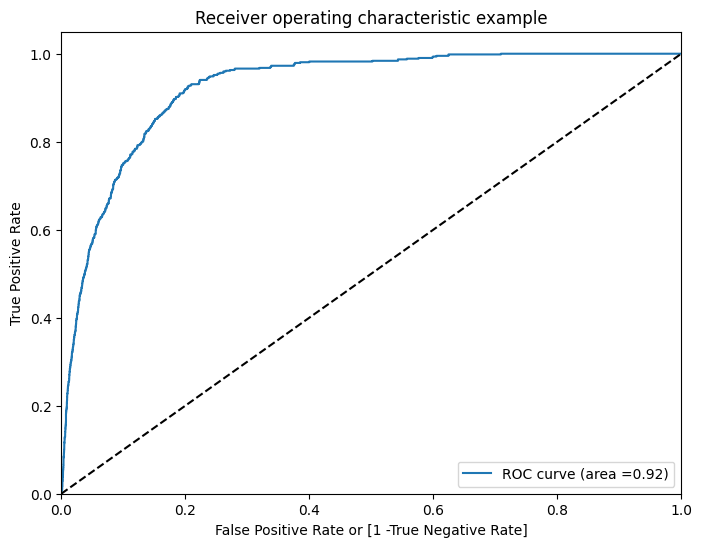

In [ ]:
#Invoking draw roc curve with the logistic regression model
_, _, _, _=draw_roc_curve (logit, test_X, test_y)